#**PRIMERA ENTREGA**

> 
##Abandono de clientes de telecomunicaciones
>Nombre del Dataset: Dataset-Telco-Customer-Churn.csv

##INTRODUCCIÓN
Este análisis se centra en el comportamiento de los clientes de telecomunicaciones que tienen más probabilidades de abandonar la plataforma. 
La idea es descubrir el comportamiento de los clientes a través del analisis exploratorio de datos (EDA) y luego utilizar algunas de las técnicas de análisis predictivo para determinar los clientes que tienen más probabilidades de abandonar.


##PREGUNTAS A RESPONDER:
*   Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.
*   Determinar como se correlacionan las distintas variables del estudio con la duracion de los contratos y la retención.
*   Predecir a través de un modelo si el cliente va a abandonar el servicio o no y cuales son las variables que mas influyen en la predicción.
*   ¿Cuáles son los indicadores clave de una rotación de clientes? 
*   ¿Qué estrategias de retención se pueden implementar en función de los resultados para disminuir la pérdida de clientes potenciales? *opcional*

In [ ]:
!pip install funpymodeling

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Carga del dataset en formato .csv






In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive') 
%cd '/content/gdrive/MyDrive/ProyectoDataScience/'
df_churn = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')
df_Original = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1JBjZRPlZTm-Ax9WZx4quXsWlJqPbkKqm/ProyectoDataScience


##Entendiendo la data
##Mostar el Dataset Preliminar (Sin transformaciones)



In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df_churn.shape

(7043, 21)

Este dataset incluye un total de 7,043 registros.

*Tambien se pueden mostar estas 4 sentencias en una sola celda*
```
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())
```




##Analisis resumido de las variables (Valores distintos)

In [ ]:
for variable in df_churn.columns:
    print(variable)
    print(df_churn[variable].unique(),"\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

##Distribución de las variables en el dataset

In [ ]:
for col in df_churn:
    print('* * * * * * * * * *',col,'* * * * * * * * * *')
    print(df_churn[col].value_counts(ascending=True))
    print(df_churn[col].value_counts(normalize=True))
    print('******************************************')

* * * * * * * * * * customerID * * * * * * * * * *
7590-VHVEG    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
8166-ZZTFS    1
             ..
1552-AAGRX    1
4304-TSPVK    1
0234-TEVTT    1
9755-JHNMN    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
7590-VHVEG    0.000142
3791-LGQCY    0.000142
6008-NAIXK    0.000142
5956-YHHRX    0.000142
5365-LLFYV    0.000142
                ...   
9796-MVYXX    0.000142
2637-FKFSY    0.000142
1552-AAGRX    0.000142
4304-TSPVK    0.000142
3186-AJIEK    0.000142
Name: customerID, Length: 7043, dtype: float64
******************************************
* * * * * * * * * * gender * * * * * * * * * *
Female    3488
Male      3555
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
******************************************
* * * * * * * * * * SeniorCitizen * * * * * * * * * *
1    1142
0    5901
Name: SeniorCitizen, dtype: int64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [ ]:
df_churn.shape   

(7043, 21)

##Contar valores NA por columna

In [ ]:
print(df_churn.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


#**SEGUNDA ENTREGA**



##Eliminación de la columna del Id de cliente que no es relevante a estudio 

In [ ]:
df_churn.drop("customerID", axis=1, inplace=True)

>
##Tasa de abandono de clientes
Se seleccionó un grafico de tarta, ya que solo hay 2 clases y se representa más claramente la magnitud de cada uno.
>Se evidenció que casi 1/4 de los clientes ha abandonado de contrato. 

([<matplotlib.patches.Wedge at 0x7fde435888b0>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

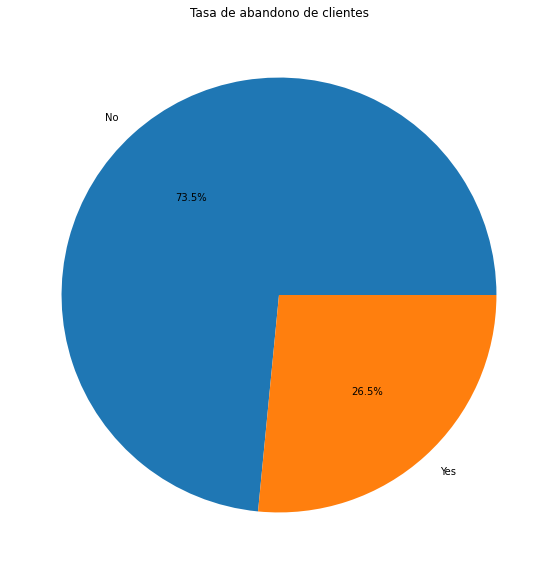

In [ ]:
sizes = df_churn['Churn'].value_counts(sort = True)
labels = np.unique(df_churn.Churn)

plt.figure(figsize = (10,10))
plt.title("Tasa de abandono de clientes")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

##Distribución de la permanencia

> Según la informacion la mayoría de los clientes que abandonaron estuvieron  en la empresa menos de 20 meses, a medida que aumenta la permanencia la probabilidad de abandonar disminuye.

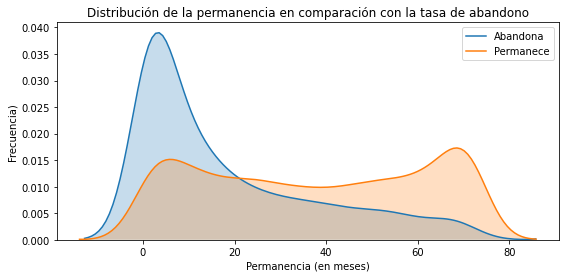

In [ ]:
plt.figure(figsize = (9,4))
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "Yes") ], shade = True)
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "No") ], shade= True)
g.set_xlabel("Permanencia (en meses)")
g.set_ylabel("Frecuencia)")
plt.title('Distribución de la permanencia en comparación con la tasa de abandono')
g = g.legend(["Abandona","Permanece"])

##Visualización de Genero
> Según la informacion no se aprecia ninguna variación importante con respecto al sexo.

(array([3488.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

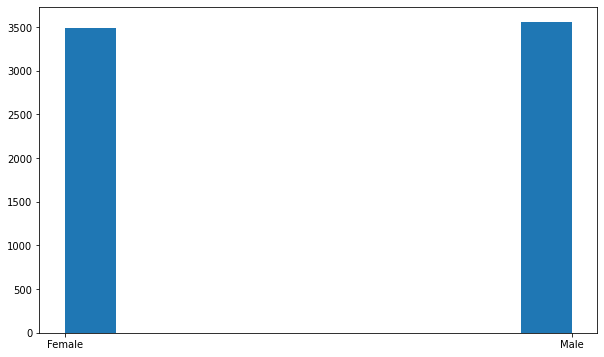

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(df_churn["gender"])

##Comportamiento general de las variables
> Usado par una exploración rapida de los datos, observando algunas variaciones importantes en cuanto a los que son dependientes ó poseen linea teléfonica adicional

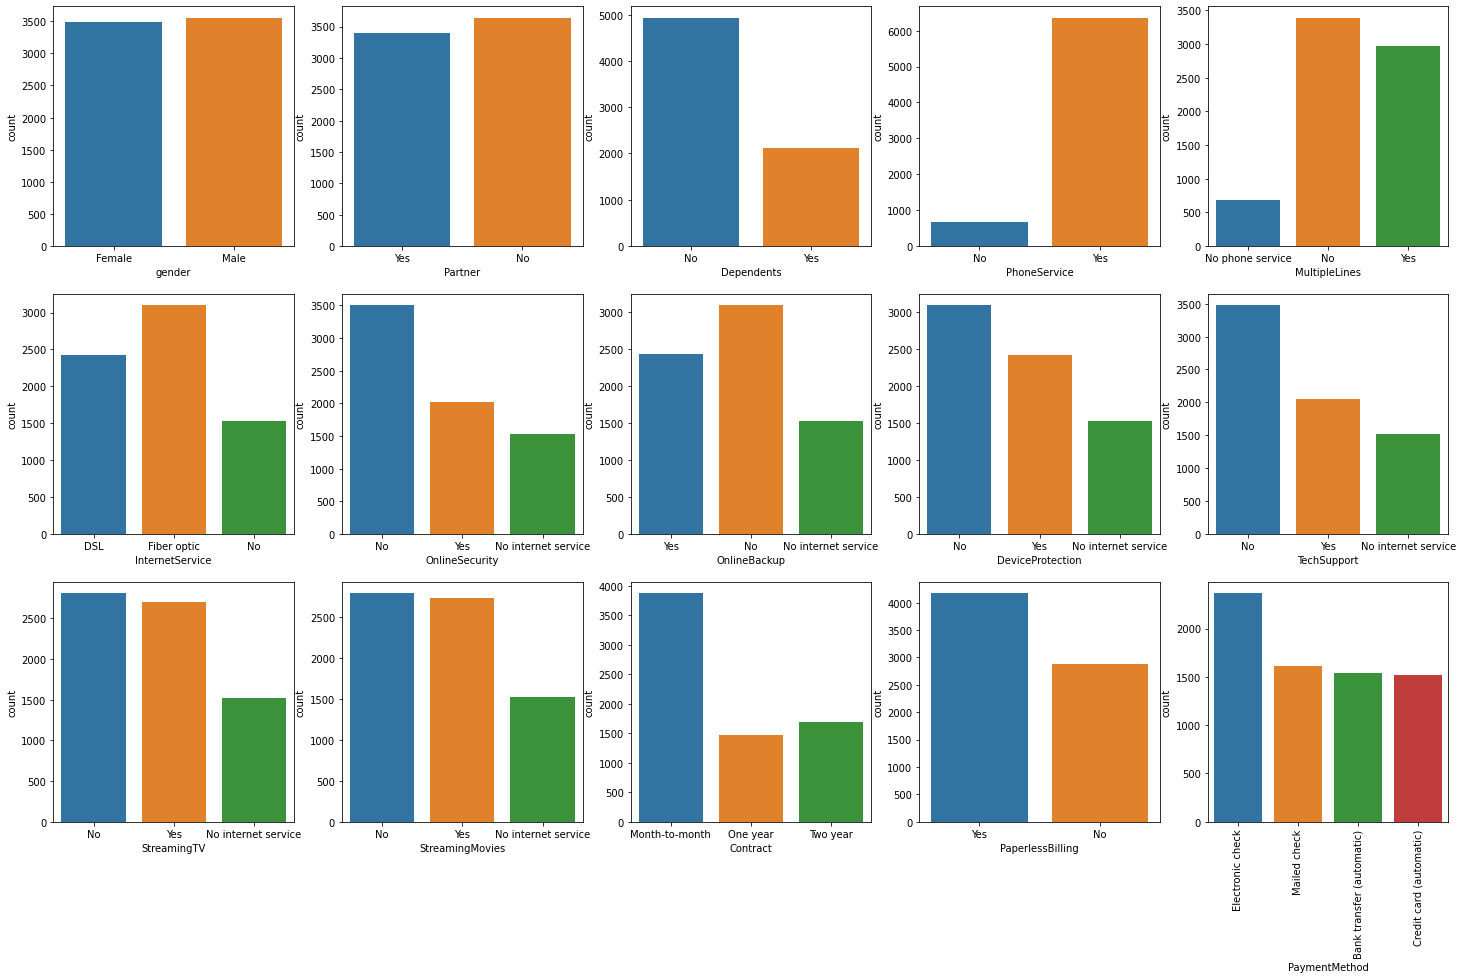

In [ ]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df_churn, ax=axes[0][0])
sns.countplot(x = "Partner", data = df_churn, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df_churn, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df_churn, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df_churn, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df_churn, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df_churn, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df_churn, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df_churn, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df_churn, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df_churn, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df_churn, ax=axes[2][1])
sns.countplot(x = "Contract", data = df_churn, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df_churn, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df_churn, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

##Relación de Genero y Seniority
> Se evidencia que en su mayoría son mujeres pero tampoco nada significativo. 

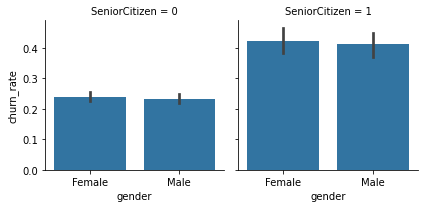

In [ ]:
df_churn['churn_rate'] = df_churn['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df_churn, col="SeniorCitizen")
ax = g.map(sns.barplot, "gender", "churn_rate", order= ['Female', 'Male'])

##Casteo de los datos
> Cambio de los tipos de datos y valores a booleanos para poder analizarlos

In [ ]:
df_churn.gender = [1 if x == "Male" else 0 for x in df_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df_churn[col] = [1 if x == "Yes" else 0 for x in df_churn[col]]        
df_churn.head(10)  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,...,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,0
7,0,0,0,0,10,0,0,DSL,1,0,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1
9,1,0,0,1,62,1,0,DSL,1,1,...,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,0


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


##Generación de Pairplot
> Relación entre pares de variables

In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn.TotalCharges, errors='coerce')
df_churn['Churn'] = pd.to_numeric(df_churn.Churn, errors='coerce')
df_churn['MonthlyCharges'] = pd.to_numeric(df_churn.MonthlyCharges, errors='coerce')
df_churn['tenure'] = pd.to_numeric(df_churn.tenure, errors='coerce')

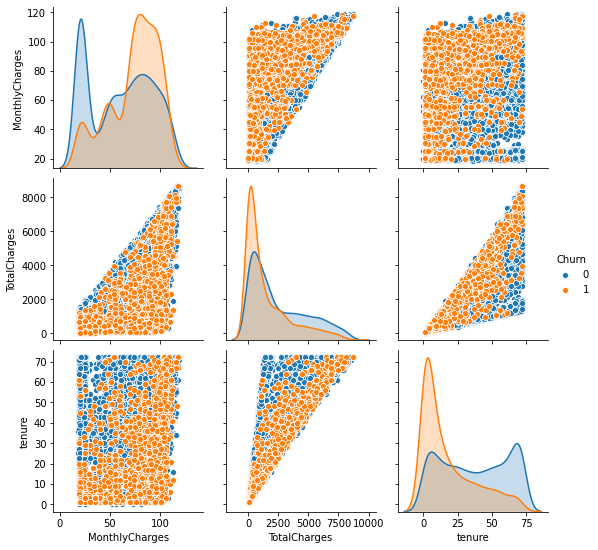

In [ ]:
highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(df_churn[highCorrCols], hue = 'Churn')

##Comportamiento de las variables: Permanencia, Cargo mensual y cargos totales
> De aqui se puede destacar que a medida que la factura es mayor existes menos suscriptores


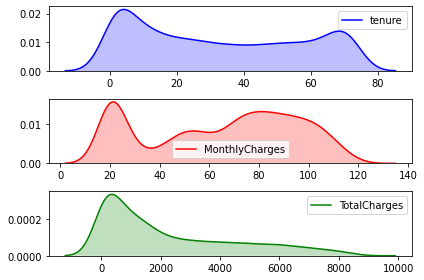

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
sns.kdeplot(df_churn["tenure"], shade=True, color="b",ax = ax1)
sns.kdeplot(df_churn["MonthlyCharges"], shade=True, color="r", ax = ax2)
sns.kdeplot(df_churn["TotalCharges"], shade=True, color="g", ax = ax3)
fig.tight_layout()
plt.show(fig)

##Relación entre medios de pago y abadono


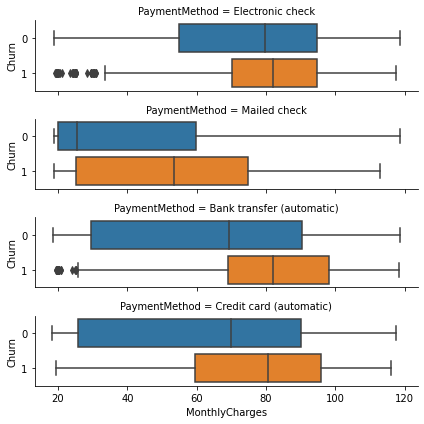

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df_churn, height=1.5, aspect=4, orient='h')

# **TERCERA ENTREGA**


##Consigna: 

Estructurando un Proyecto de DS (parte I)


Continuarás trabajando con base en lo realizado en el Desafío entregable: Visualización en Python, en esta oportunidad deberás complementar con lo siguiente:
1.   Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.   Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.
3.   Interpretar los resultados obtenidos

Formato

**Entregar un archivo con formato .ipynb.**

*  Debe tener el nombre “ProyectoDS_ParteI_+Apellido.ipynb”

**Sugerencias**

*  Preparar el código y probar los resultados con subconjuntos del conjunto original.

**Aspectos a incluir:**

*  El código debe estar hecho en un notebook y debe estar probado.

##Hipótesis de interés sobre el dataset.


1.  Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.
2.   Determinar como se correlacionan las distintas variables del estudio con la duracion de los contratos y la retención.
3. Determinar si el aumento en los cargos incide en al tasa de abandono
4.   Predecir a través de un modelo si el cliente va a abandonar el servicio o no y cuales son las variables que mas influyen en la predicción.
5.   ¿Cuáles son los indicadores clave de la rotación de clientes? 
6. Demostrar que el aumento de los servicios contratados indide en la permanencia de los clientes
7.   ¿Qué estrategias de retención se pueden implementar en función de los resultados para disminuir la pérdida de clientes potenciales? *opcional*

##Descripción general de los datos.


In [ ]:
from funpymodeling.exploratory import status
status(df_churn) 

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.000000,3488,0.495244,2,int64
1,SeniorCitizen,0,0.000000,5901,0.837853,2,int64
2,Partner,0,0.000000,3641,0.516967,2,int64
3,Dependents,0,0.000000,4933,0.700412,2,int64
4,tenure,0,0.000000,11,0.001562,73,int64
5,PhoneService,0,0.000000,682,0.096834,2,int64
6,MultipleLines,0,0.000000,4072,0.578163,2,int64
7,InternetService,0,0.000000,0,0.000000,3,object
8,OnlineSecurity,0,0.000000,5024,0.713332,2,int64
9,OnlineBackup,0,0.000000,4614,0.655119,2,int64


In [ ]:
display(df_churn.describe().T)

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.000,1.0000,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.000,1.0000,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.000,1.0000,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.000,1.0000,1.00


##Visualizaciones y Resúmenes numéricos básicos acordes con los tipos de variables disponibles.


---------- Servicios contratados vs. la retencion del cliente ---------- 
TotalServices
0     8.887500
1    20.945914
2    24.336700
3    24.489119
4    32.054230
5    41.452643
6    51.050296
7    59.759494
8    66.336538
Name: tenure, dtype: float64 


---------- Analisis de servicios contratados ----------
PhoneService  MultipleLines
1             0                24.134808
0             0                31.737537
1             1                41.914507
Name: tenure, dtype: float64

---------- Analisis de servicios de streaming ----------
StreamingTV  StreamingMovies
0            0                  25.742946
1            0                  31.559322
0            1                  32.311869
1            1                  44.824742
Name: tenure, dtype: float64


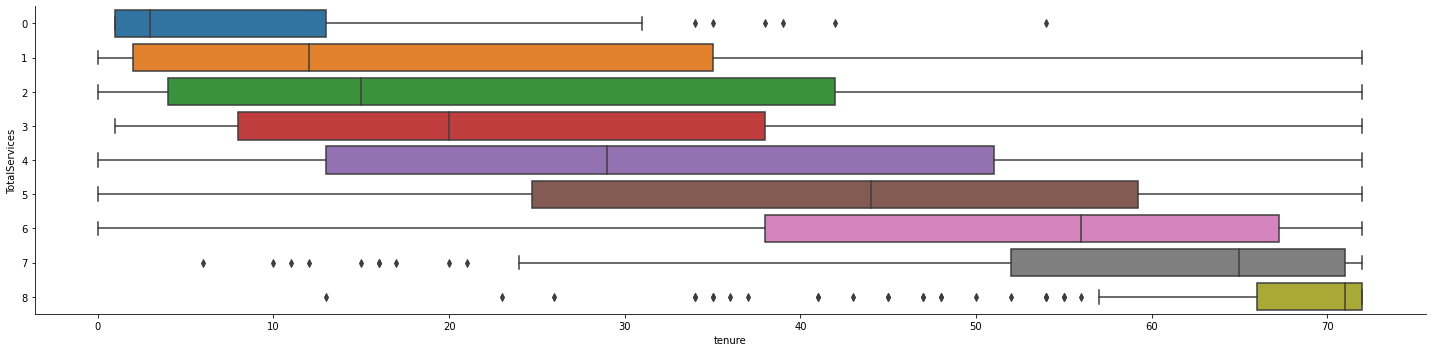

In [ ]:
# 1.- Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.
df_churn['TotalServices'] = df_churn['PhoneService'] + df_churn['MultipleLines'] + df_churn['OnlineSecurity'] + df_churn['OnlineBackup'] + df_churn['DeviceProtection']+ df_churn['TechSupport'] + df_churn['StreamingTV'] + df_churn['StreamingMovies']
print('---------- Servicios contratados vs. la retencion del cliente ---------- ')
print(df_churn.groupby(by=['TotalServices'])['tenure'].mean().sort_values(), '\n')

#Analisis de servicios adicionales
print(f'\n---------- Analisis de servicios contratados ----------')
print(df_churn.groupby(by=['PhoneService', 'MultipleLines'])['tenure'].mean().sort_values())

#Incidencia de los servicios de streaming
print(f'\n---------- Analisis de servicios de streaming ----------')
print(df_churn.groupby(by=['StreamingTV', 'StreamingMovies'])['tenure'].mean().sort_values())

ax = sns.catplot(y="TotalServices", x="tenure", kind="box",  data=df_churn, height=5, aspect=4, orient='h')

*Podemos decir con este gráfico que mientras mayor es la catidad de servicios contratados mayor es la permanencia*

Text(0, 0.5, 'Factor de correlación')

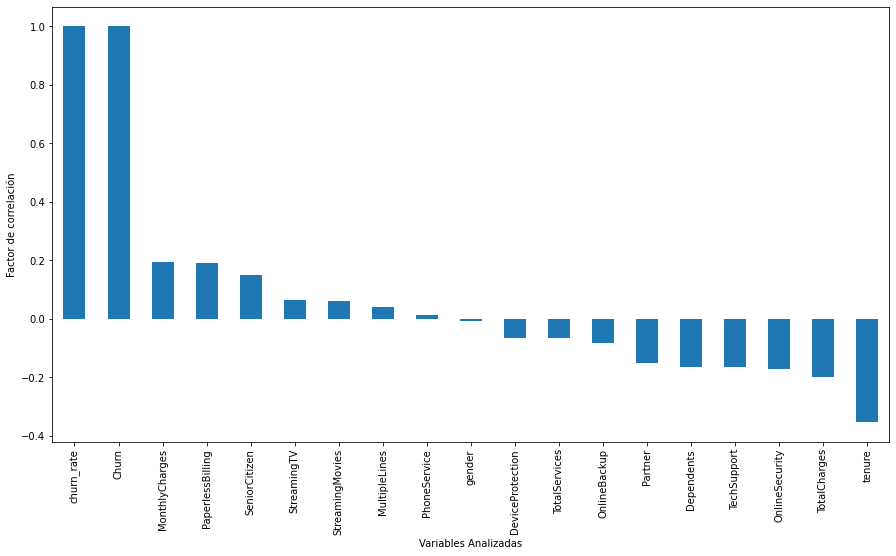

In [ ]:
#2.- Determinar como se correlacionan las distintas variables del estudio con la duracion de los contratos y la retención
plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Variables Analizadas')
plt.ylabel('Factor de correlación')

*Para mostrar cuales variables inciden positiva o negativamente sobre la viariable objetivo*


---------- Comportamiento de los pagos de acuerdo al genero ----------
PaymentMethod
Bank transfer (automatic)    0.489637
Electronic check             0.505285
Credit card (automatic)      0.505913
Mailed check                 0.517370
Name: gender, dtype: float64 

PaymentMethod              gender
Mailed check               1         1024.702533
                           0         1086.340387
Electronic check           0         2017.955684
                           1         2162.255314
Credit card (automatic)    1         3031.106948
Bank transfer (automatic)  0         3064.537802
                           1         3094.686954
Credit card (automatic)    0         3112.704394
Name: TotalCharges, dtype: float64


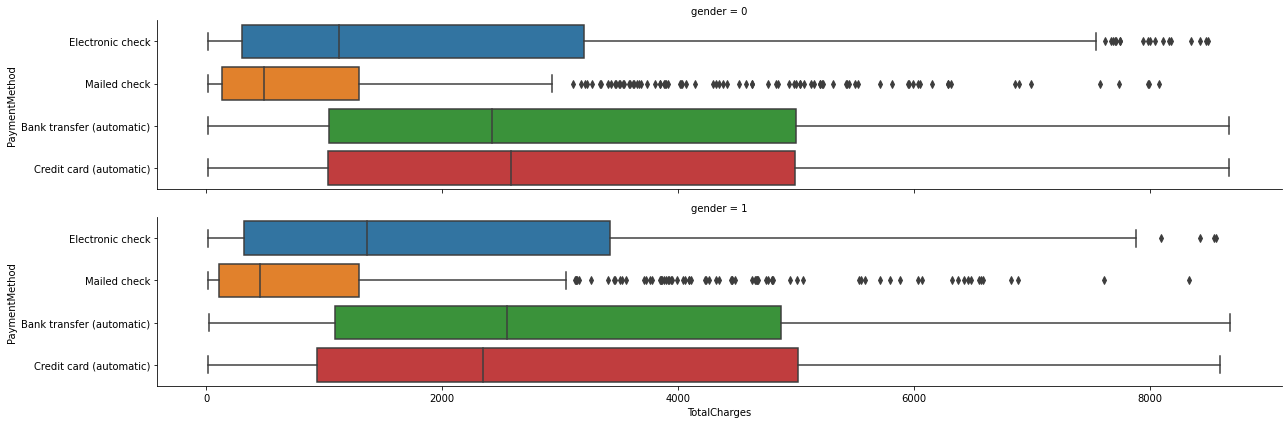

In [ ]:
#Comportamiento de los pagos de acuerdo al genero
print(f'\n---------- Comportamiento de los pagos de acuerdo al genero ----------')
print(df_churn.groupby(by=['PaymentMethod'])['gender'].mean().sort_values(), '\n')

print(df_churn.groupby(by=['PaymentMethod', 'gender'])['TotalCharges'].mean().sort_values())

ax = sns.catplot(y="PaymentMethod", x="TotalCharges", row="gender", kind="box",  data=df_churn, height=3, aspect=6, orient='h')

*No existe una variación significativa del comportamiento de pagos de acuerdo al genero, solo que los paos automaticos son mayores a los que no son automaticos y el menos utilizado es el cheque.*


---------- Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono ----------
Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
1    1531.796094
0    2555.344141
Name: TotalCharges, dtype: float64 



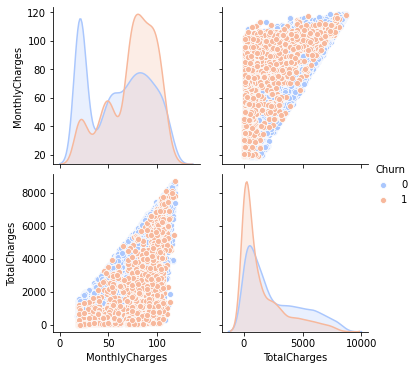

In [ ]:
#Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono
print(f'\n---------- Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono ----------')
print(df_churn.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['Churn'])['TotalCharges'].mean().sort_values(), '\n')

datos_1 = ['MonthlyCharges','TotalCharges','Churn']
sns.pairplot(df_churn[datos_1], hue = 'Churn', palette='coolwarm')

*Segun el grafico anterior podemos deducir en cuanto al cargo mensual a medida que aumenta esta variable aumenta el abandono, y inversamente sucede con el cargo total, porque se acumula con la antiguedad (estas variables juntas no arrojan ninguna información relevante)*

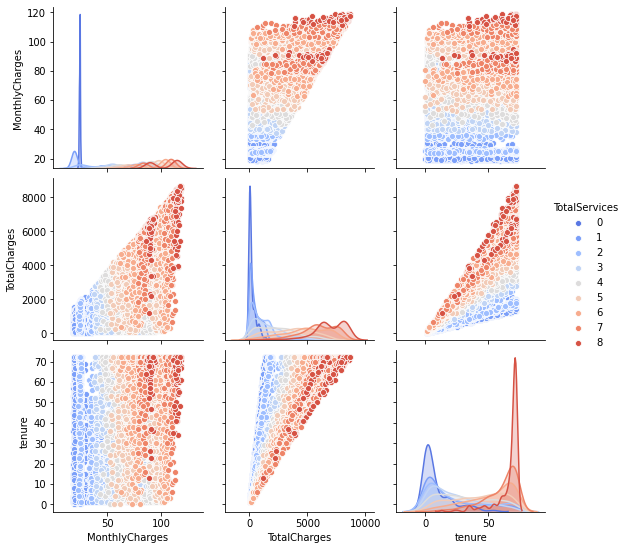

In [ ]:
#Demostrar que el aumento de los servicios contratados indide en la permanencia de los clientes
datos_2 = ['MonthlyCharges','TotalCharges','tenure','TotalServices']
sns.pairplot(df_churn[datos_2], hue = 'TotalServices', palette='coolwarm')

*En el grafico anterior, tratamos de mostrar como la cantidad de servicios contratados influiría en la permanencia del suscriptor, como que por la informacion analizada no crea una tendencia paraticular que se pueda analizar a fondo para demostrar esta influencia, en la primera linea solo vemos que a menor cantidad de serivicos el cargo mensual es menor con ciertos datos que estan fuera del promedio a excepción de algunos clientes con 4 servicios contratados que estan teniendo unos cargos superiores a la media, en al segunda linea de graficos el comportamiento con respecto al tota de cargos es similar al anterior pero sin destacar nada adicional y con respecto a la permanencia pordemos inferir que con respecto a esta variable (Permanencia) a medida que aumenta esta aumentan los cargos. (mesuales y totales)*

## Resumen numérico con los tipos de variables

Calculemos los cargos mensuales promedio de cada categoría en las funciones de soporte técnico y seguridad en línea.

In [ ]:
print(df_churn.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
0    58.252931
1    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
0    59.104538
1    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity  TechSupport
0               0              54.319625
1               0              75.692011
0               1              79.758148
1               1              81.472930
Name: MonthlyCharges, dtype: float64


*Ambos servicios no parecen afectar mucho los cargos de suscripción y dado que la mayoría de los clientes no se suscriben a esos serviciospodrian tener un impacto significativo en la retención de clientes*

*Veamos si la tasa de abandono se reduce significativamente para los clientes que tienen acceso a ambos servicios.*

In [ ]:
print(df_churn.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts(), '\n')

TechSupport  OnlineSecurity
0            0                 4079
             1                  920
1            1                 1099
             0                  945
Name: OnlineSecurity, dtype: int64 

